<a href="https://colab.research.google.com/github/s0ku00/DTS/blob/main/Personality_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personality Prediction Project
## Project Framework
The primary prediction objective is to build a predictive model that classifies individuals as Introvert or Extrovert based on features describing social behavior and lifestyle patterns.

* Hypothesis 1: Individuals who report spending more time alone and feel drained after socializing are more likely to be introverts.
*	Hypothesis 2: Extroversion is correlated with larger friends_circle_size and higher post_frequency.

## Dataset Description
Extrovert vs Introvert Behavior Data : https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data?select=personality_dataset.csv

### Features
* Time_spent_Alone -	Hours spent alone per day
* Stage_fear -	1 = Yes, 0 = No
* Social_event_attendance	- Number of social events attended monthly
* Going_outside	- Frequency of going outside
* Drained_after_socializing -	1 = Yes, 0 = No
* Friends_circle_size -	Number of friends
* Post_frequency -	Frequency of posting on social media
* Personality	- Target variable (Introvert/Extrovert)

## Loading and inspecting the dataset

* The dataset has 2900 rows and 8 columns.
* 5 numeric columns and 3 categorical columns, including the target column(Personality).

In [1]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn import tree
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 2900 rows and 8 columns


In [6]:
df.describe(include= 'all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [8]:
df.nunique()

,0
Time_spent_Alone,12
Stage_fear,2
Social_event_attendance,11
Going_outside,8
Drained_after_socializing,2
Friends_circle_size,16
Post_frequency,11
Personality,2


## Handling Duplicates
The dataset contains 388 duplicated rows, I decided to drop the duplicated rows to avoid model bias. Most of the duplicated rows were introverts and this slightly changed the class distribution from 51% Extrovert / 49% Introvert to 56% Extrovert / 44% Introvert.

In [9]:
df.duplicated().sum()

np.int64(388)

In [10]:
duplicates_df = df.copy()
duplicates = duplicates_df[duplicates_df.duplicated(keep=False)]
display(duplicates)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
13,3.0,No,6.0,4.0,No,10.0,7.0,Extrovert
20,10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert
23,9.0,Yes,2.0,2.0,Yes,1.0,0.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


In [11]:
# Before removing duplicates

print("Class balance BEFORE removing duplicates:\n")
print(df['Personality'].value_counts(normalize=True) * 100)

Class balance BEFORE removing duplicates:

Personality
Extrovert    51.413793
Introvert    48.586207
Name: proportion, dtype: float64


In [12]:
# After removing duplicates

df_clean = df.drop_duplicates()
print("Class balance AFTER removing duplicates:\n")
print((df_clean['Personality'].value_counts(normalize=True) * 100).round(2))


Class balance AFTER removing duplicates:

Personality
Extrovert    56.41
Introvert    43.59
Name: proportion, dtype: float64


In [13]:
df_clean.shape

(2512, 8)

## Handling missing values
* Missing values unique row count is 414 which means 16.5% of the dataset have missing values. This value is too high to drop.

* Numerical missing values were filled using KNN imputer.

* Categorical missing values were filled using mode.

In [14]:
df_clean.isnull().sum()

,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63
Personality,0


In [15]:
df_clean.isnull().any(axis=1).sum()

np.int64(414)

In [16]:
# Defining categorical and numeric columns
cat_columns = ['Stage_fear', 'Drained_after_socializing']

num_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

target = 'Personality'

In [17]:
display(df["Stage_fear"].value_counts(dropna=False))
display(df["Drained_after_socializing"].value_counts(dropna=False))

,count
Stage_fear,
No,1417
Yes,1410
NaN,73


,count
Drained_after_socializing,
No,1441
Yes,1407
NaN,52


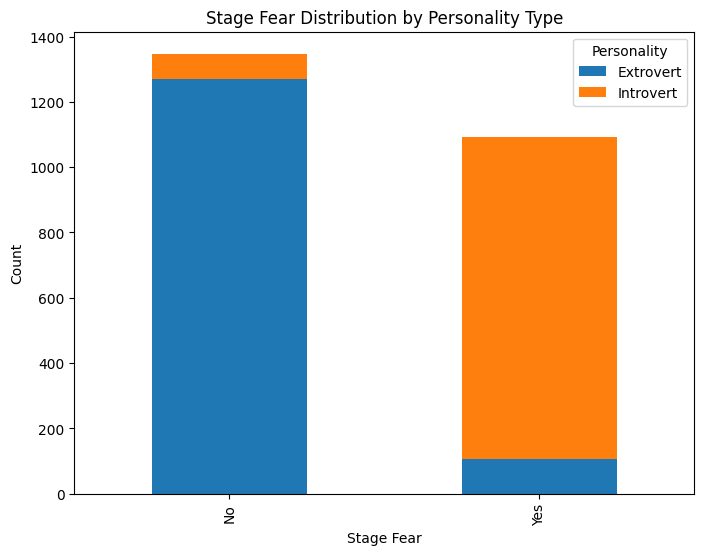

In [18]:
stage_fear_counts = df_clean.groupby(["Stage_fear", "Personality"]).size().unstack()

stage_fear_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6)
)

plt.xlabel("Stage Fear")
plt.ylabel("Count")
plt.title("Stage Fear Distribution by Personality Type")
plt.legend(title="Personality")
plt.show()

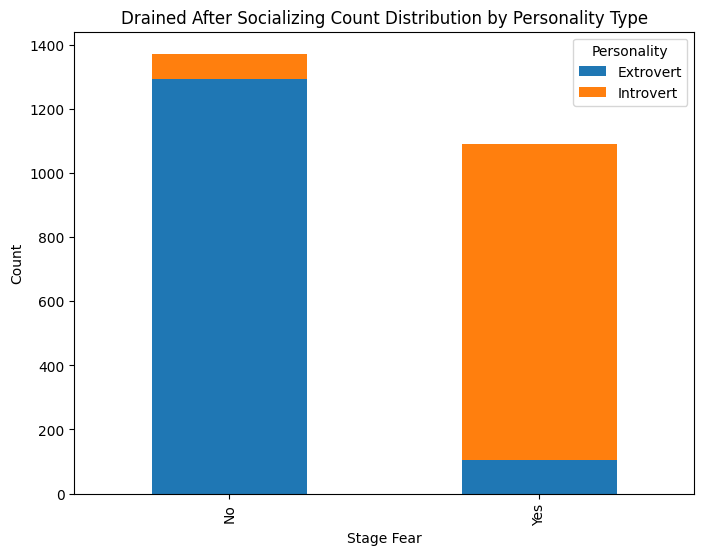

In [19]:
Drained_after_socializing_count = df_clean.groupby(["Drained_after_socializing", "Personality"]).size().unstack()

Drained_after_socializing_count.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6)
)

plt.xlabel("Stage Fear")
plt.ylabel("Count")
plt.title("Drained After Socializing Count Distribution by Personality Type")
plt.legend(title="Personality")
plt.show()

In [20]:
for col in cat_columns:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])
    print(f"Missing values in {col} column: {df_clean[col].isnull().sum()}")

Missing values in Stage_fear column: 0
Missing values in Drained_after_socializing column: 0


In [21]:
imputer = KNNImputer(n_neighbors=5)
df_clean[num_columns] = imputer.fit_transform(df_clean[num_columns])
print(df_clean[num_columns].isnull().sum())

Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64


/tmp/ipython-input-2580497944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[num_columns] = imputer.fit_transform(df_clean[num_columns])


In [22]:
df_clean.shape

(2512, 8)

## Checking for outliers
There are no outliers in the dataset.

In [23]:
outlier_summary = {}

for col in num_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'Time_spent_Alone': 0,
 'Social_event_attendance': 0,
 'Going_outside': 0,
 'Friends_circle_size': 0,
 'Post_frequency': 0}

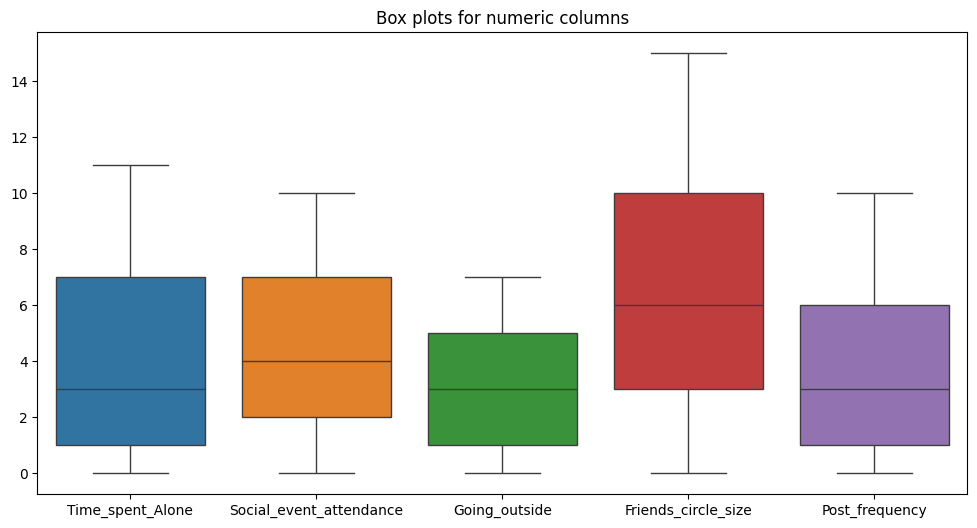

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[num_columns])
plt.title('Box plots for numeric columns')
plt.show()

## EDA
### Key findings
* Visible separation between extroverts and introverts across multiple features.

* Higher Time_spent_Alone is frequently associated with Introverts.

* People with large friend circles tend to classify as Extroverts.

* Time spent alone has a negative correlation with all other numerical columns.

* Attending social events and the size of friends' circles are positively correlated with extroversion.

* PCA plot reflected the introversion and extroversion axis, clearly separating the groups.

* Some introverts and extroverts showed behaviors that are counterintuitive, might suggest a third class (Ambiverts) *italicized text*

In [25]:
from ydata_profiling import ProfileReport

# Create ydata_profiling Report
profile = ProfileReport(df, title='Telecom Churn Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 40.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

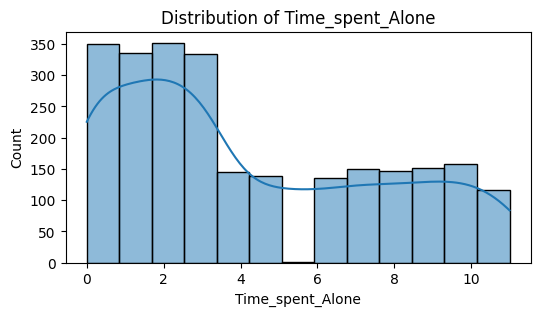

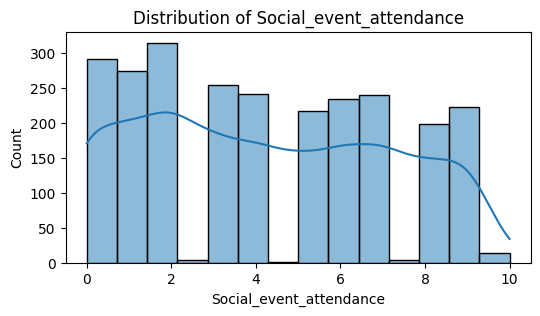

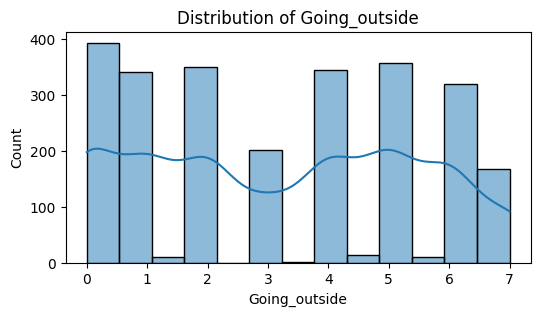

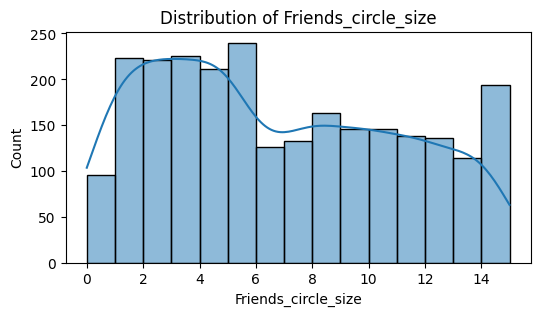

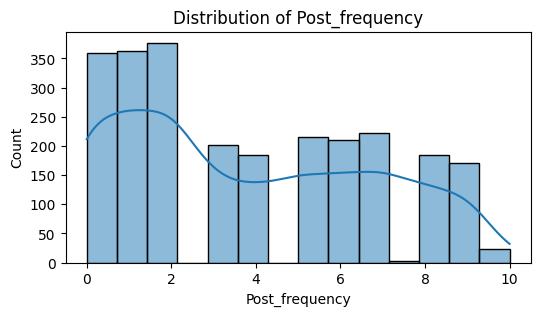

In [26]:
# Plotting the distribution of the numerical columns
for col in num_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

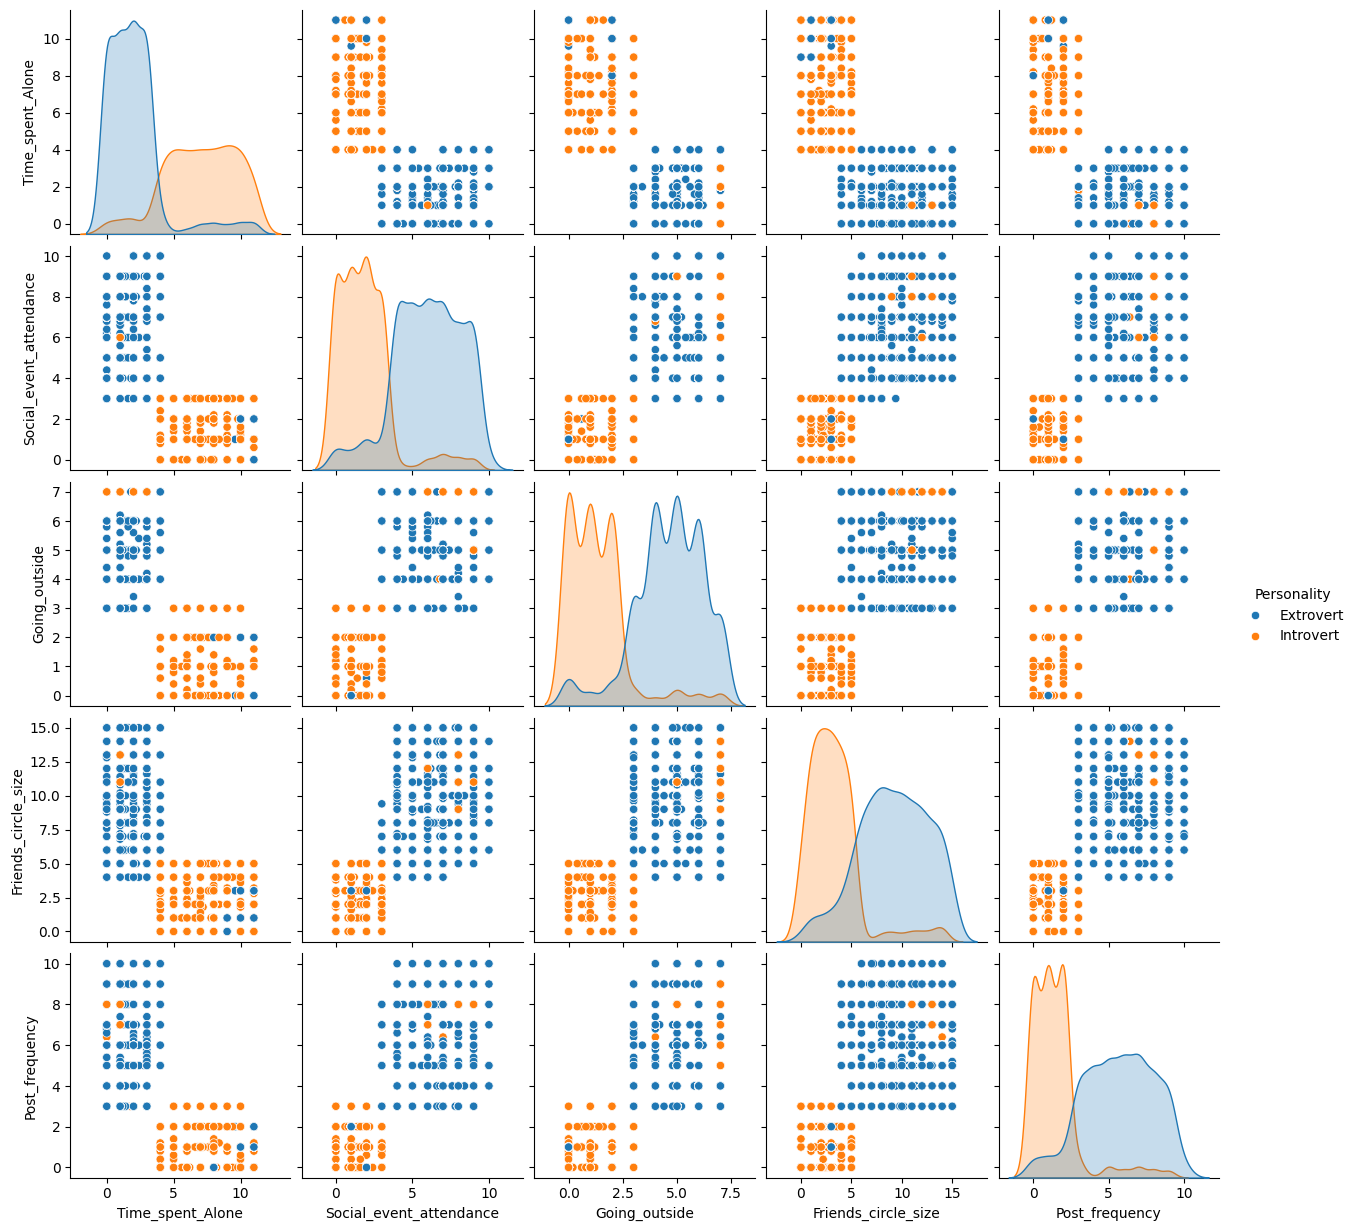

In [27]:
sns.pairplot(df_clean, hue="Personality")

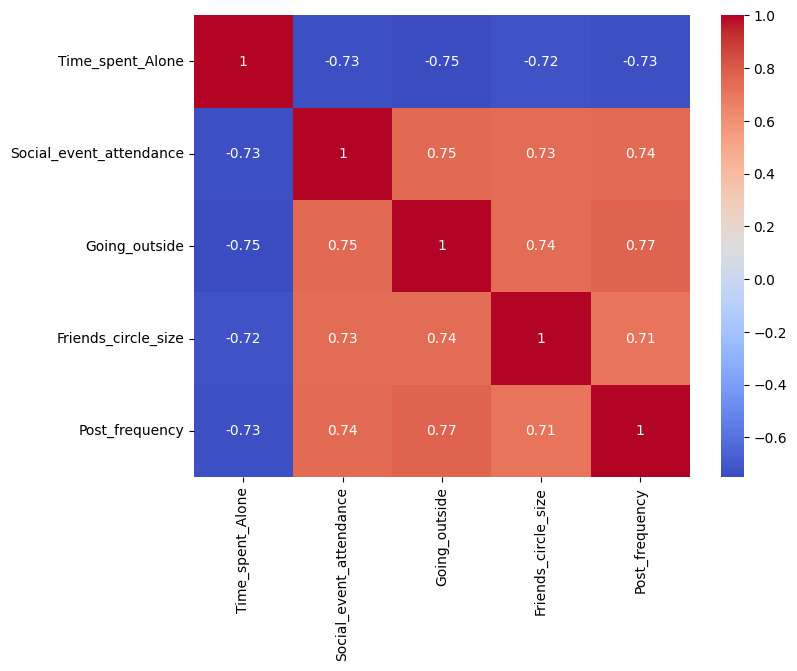

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_columns].corr(), annot=True, cmap="coolwarm")
plt.show()

In [29]:
# PCA Transformation
X_pca = df_clean[num_columns]

X_scaled_pca = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled_pca)


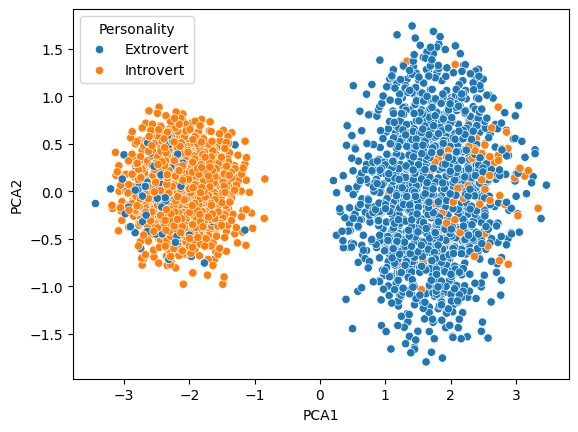

In [30]:
pca_df = pd.DataFrame({
    "PCA1": components[:, 0],
    "PCA2": components[:, 1],
    "Personality": df_clean["Personality"]
})

sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Personality")
plt.show()

## Data Preparation

* Encoding the categorical features and target variable.
* Split the data into 80% training data and 20% test data.
* Used StandardScaler to scale the features.

In [31]:
# Encoding the categorical variables
le = LabelEncoder()
df_clean["Stage_fear"] = le.fit_transform(df_clean["Stage_fear"])
df_clean["Drained_after_socializing"] = le.fit_transform(df_clean["Drained_after_socializing"])
df_clean["Personality"] = le.fit_transform(df_clean["Personality"])

df_clean

/tmp/ipython-input-130654833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Stage_fear"] = le.fit_transform(df_clean["Stage_fear"])
/tmp/ipython-input-130654833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Drained_after_socializing"] = le.fit_transform(df_clean["Drained_after_socializing"])
/tmp/ipython-input-130654833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2894,0.0,0,9.0,3.0,0,12.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1
2898,11.0,1,1.0,1.0,1,2.0,0.0,1


In [32]:
# Spliting the data into test and train

X = df_clean.drop("Personality", axis=1)
y = df_clean["Personality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Scaling the features

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model building

* Support Vector Machine (SVM) is the Best model, with an accuracy of 91%.

* Logistic Regression and SVM highlights emotional & social exhaustion as the strongest predicting features.

* Random forest focused more on activities (event attendance, time alone) rather than emotional factors.

* The accuracy for Random Forest is slightly lower than LR/SVM.

## Model	accuracy
* SVM	- 0.9145
* Logistic Regression	- 0.9125
* Random Forest	- 0.8986


### Logistic Regression

In [34]:
# Logistic Regression WITHOUT SMOTE
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9125248508946322
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       284
           1       0.88      0.93      0.90       219

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503



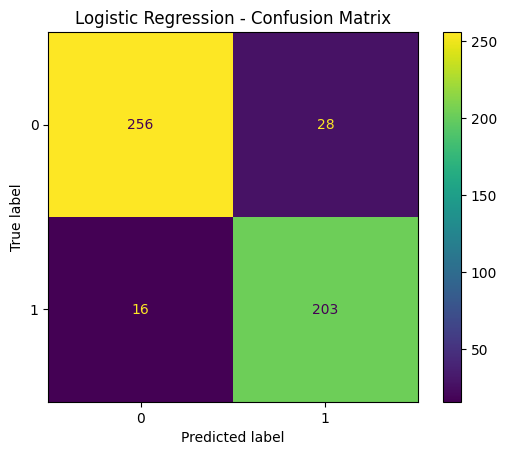

In [35]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [36]:
# Feature importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                     Feature  Coefficient
1                 Stage_fear     1.188472
4  Drained_after_socializing     1.152385
5        Friends_circle_size     0.199059
0           Time_spent_Alone    -0.059699
3              Going_outside    -0.097573
2    Social_event_attendance    -0.146744
6             Post_frequency    -0.229373


### Support Vector Machine (SVM)

In [37]:
# Model
svm = SVC(kernel="rbf", C=1.0, gamma="scale")
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9145129224652088
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       284
           1       0.88      0.93      0.90       219

    accuracy                           0.91       503
   macro avg       0.91      0.92      0.91       503
weighted avg       0.92      0.91      0.91       503



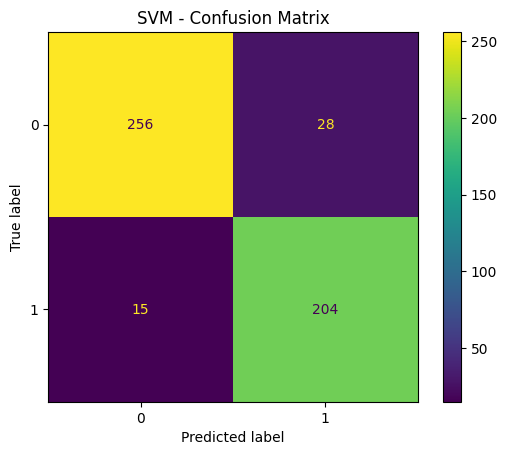

In [38]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title("SVM - Confusion Matrix")
plt.show()

In [39]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_test_scaled, y_test, n_repeats=20)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
4  Drained_after_socializing    0.040755
1                 Stage_fear    0.016103
0           Time_spent_Alone    0.000000
2    Social_event_attendance    0.000000
3              Going_outside    0.000000
5        Friends_circle_size    0.000000
6             Post_frequency    0.000000


### Random Forest

In [40]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8986083499005965
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       284
           1       0.87      0.91      0.89       219

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



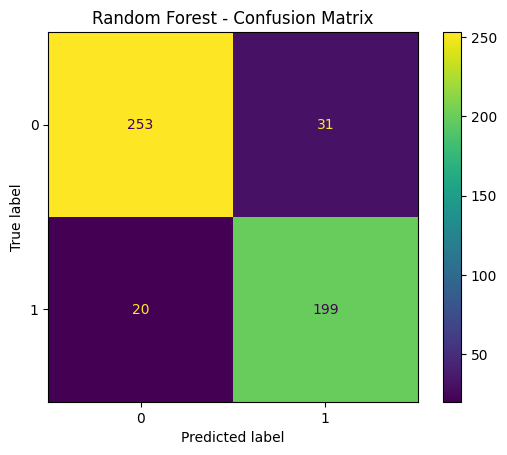

In [41]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [42]:
# Built-in feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
2    Social_event_attendance    0.245334
0           Time_spent_Alone    0.226039
6             Post_frequency    0.200012
3              Going_outside    0.134843
1                 Stage_fear    0.082649
5        Friends_circle_size    0.068823
4  Drained_after_socializing    0.042300


## Future improvement
* Evaluate on original (unscaled) test labels.

* Predict a third class (Ambiverts)

* Hyperparameter Tuning

* Building a Streamlit app for personality prediction